# HOUSE PRICES PREDICTION
문제: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
- DATE: '21.6/21  
- AUTHOR: SungwookLE(joker1251@naver.com)  
- REFERENCE: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

![image](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## 1. Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## 2. Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Submission File Format
The file should contain a header and have the following format:
```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

## 3. File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 4. Data fields
Here's a brief version of what you'll find in the data description file.  

|**Key**|**Value**|
|:---|:---|
|SalePrice|the property's sale price in dollars. This is the **target** variable that you're trying to predict.|
|MSSubClass|The building class|
|MSZoning|The general zoning classification|
|LotFrontage|Linear feet of street connected to property|
|LotArea|Lot size in square feet|
|Street|Type of road access|
|Alley|Type of alley access|
|LotShape|General shape of property|
|LandContour|Flatness of the property|
|Utilities|Type of utilities available|
|LotConfig|Lot configuration|
|LandSlope|Slope of property|
|Neighborhood|Physical locations within Ames city limits|
|Condition1|Proximity to main road or railroad|
|Condition2|Proximity to main road or railroad (if a second is present)|
|BldgType|Type of dwelling|
|HouseStyle|Style of dwelling|
|OverallQual|Overall material and finish quality|
|OverallCond|Overall condition rating|
|YearBuilt|Original construction date|
|YearRemodAdd|Remodel date|
|RoofStyle|Type of roof|
|RoofMatl|Roof material|
|Exterior1st|Exterior covering on house|
|Exterior2nd|Exterior covering on house (if more than one material)|
|MasVnrType|Masonry veneer type|
|MasVnrArea|Masonry veneer area in square feet|
|ExterQual|Exterior material quality|
|ExterCond|Present condition of the material on the exterior|
|Foundation|Type of foundation|
|BsmtQual|Height of the basement|
|BsmtCond|General condition of the basement|
|BsmtExposure|Walkout or garden level basement walls|
|BsmtFinType1|Quality of basement finished area|
|BsmtFinSF1|Type 1 finished square feet|
|BsmtFinType2|Quality of second finished area (if present)|
|BsmtFinSF2|Type 2 finished square feet|
|BsmtUnfSF|Unfinished square feet of basement area|
|TotalBsmtSF|Total square feet of basement area|
|Heating|Type of heating|
|HeatingQC|Heating quality and condition|
|CentralAir|Central air conditioning|
|Electrical|Electrical system|
|1stFlrSF|First Floor square feet|
|2ndFlrSF|Second floor square feet|
|LowQualFinSF|Low quality finished square feet (all floors)|
|GrLivArea|Above grade (ground) living area square feet|
|BsmtFullBath|Basement full bathrooms|
|BsmtHalfBath|Basement half bathrooms|
|FullBath|Full bathrooms above grade|
|HalfBath|Half baths above grade|
|Bedroom|Number of bedrooms above basement level|
|Kitchen|Number of kitchens|
|KitchenQual|Kitchen quality|
|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)|
|Functional|Home functionality rating|
|Fireplaces|Number of fireplaces|
|FireplaceQu|Fireplace quality|
|GarageType|Garage location|
|GarageYrBlt|Year garage was built|
|GarageFinish|Interior finish of the garage|
|GarageCars|Size of garage in car capacity|
|GarageArea|Size of garage in square feet|
|GarageQual|Garage quality|
|GarageCond|Garage condition|
|PavedDrive|Paved driveway|
|WoodDeckSF|Wood deck area in square feet|
|OpenPorchSF|Open porch area in square feet|
|EnclosedPorch|Enclosed porch area in square feet|
|3SsnPorch|Three season porch area in square feet|
|ScreenPorch|Screen porch area in square feet|
|PoolArea|Pool area in square feet|
|PoolQC|Pool quality|
|Fence|Fence quality|
|MiscFeature|Miscellaneous feature not covered in other categories|
|MiscVal|$Value of miscellaneous feature|
|MoSold|Month Sold|
|YrSold|Year Sold|
|SaleType|Type of sale|
|SaleCondition|Condition of sale|

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # set default in matplotlib
# 여러가지 Seaborn 그래프: https://dining-developer.tistory.com/30

In [4]:
train_original = pd.read_csv('input/train.csv')
test_original = pd.read_csv('input/test.csv')

train = train_original.copy()
test = test_original.copy()

## 5. 데이터 살펴보기
- DataFrame의 Columns, index 정보, Shape 보기
- `head()`, `tail()`로 직접 몇개 출력해서 보기
- `describe()`, `info()`, `isnull().sum()`, `value_counts()` 등으로 데이터 살펴보기

In [5]:
print(train.shape)
train.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
print(test.shape)
test.head()

(1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [7]:
# DRAWING DATA WITH INT DATA FOR ANALYSIS
# 숫자 데이터들 중 SalePrice와의 상관관계를 살펴보기 위해 다양한 그림을 그려보자

train_draw = train_original.copy()
def drop_axis(df, feature):
    df.drop(feature, axis=1, inplace=True)

for feature in train_draw.columns:
    if (train.dtypes[feature]=='object'):
        drop_axis(train_draw, feature)

for data in train_draw.isnull().sum().items():
    if(data[1] > 0):
        drop_axis(train_draw, data[0])

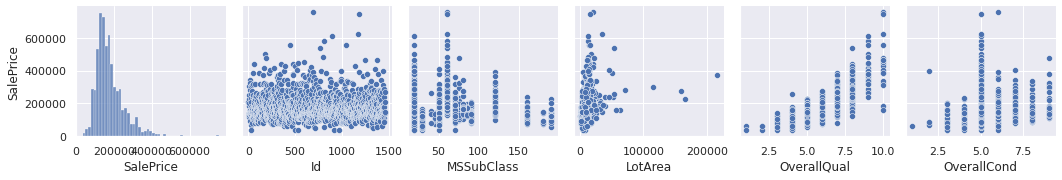

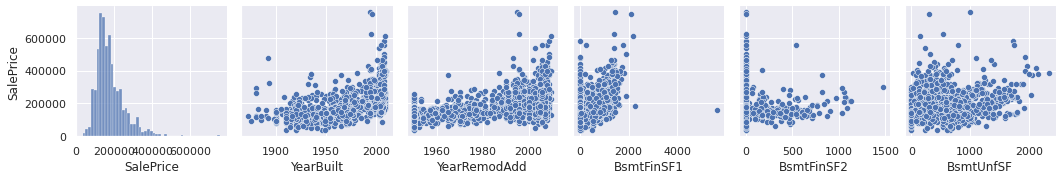

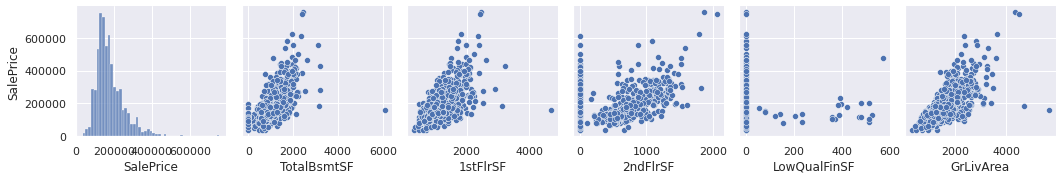

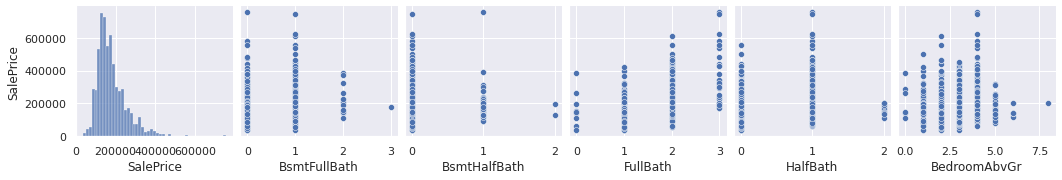

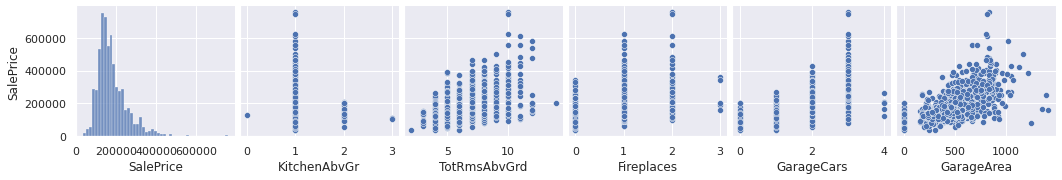

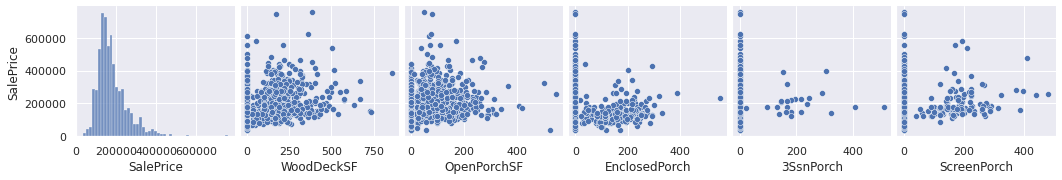

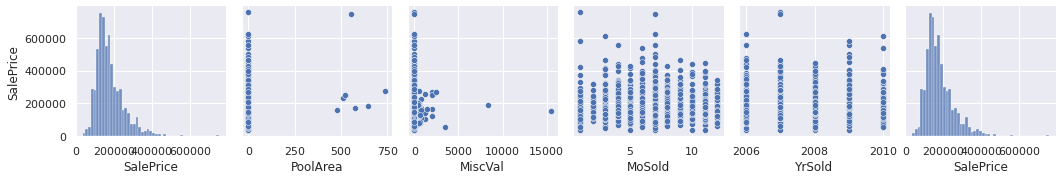

In [8]:
sn1=sns.pairplot(data=train_draw,\
             x_vars=np.concatenate([ ['SalePrice'] ,train_draw.columns.values[0:5]]),\
             y_vars=['SalePrice'])

sn2=sns.pairplot(data=train_draw,\
             x_vars=np.concatenate([ ['SalePrice'] ,train_draw.columns.values[5:10]]),\
             y_vars=['SalePrice'])
sn3=sns.pairplot(data=train_draw,\
             x_vars=np.concatenate([ ['SalePrice'] ,train_draw.columns.values[10:15]]),\
             y_vars=['SalePrice'])
sn4=sns.pairplot(data=train_draw,\
             x_vars=np.concatenate([ ['SalePrice'] ,train_draw.columns.values[15:20]]),\
             y_vars=['SalePrice'])

sn5=sns.pairplot(data=train_draw,\
             x_vars=np.concatenate([ ['SalePrice'] ,train_draw.columns.values[20:25]]),\
             y_vars=['SalePrice'])

sn6=sns.pairplot(data=train_draw,\
             x_vars=np.concatenate([ ['SalePrice'] ,train_draw.columns.values[25:30]]),\
             y_vars=['SalePrice'])

sn7=sns.pairplot(data=train_draw,\
             x_vars=np.concatenate([ ['SalePrice'] ,train_draw.columns.values[30:]]),\
             y_vars=['SalePrice'])

plt.show()

In [9]:
# 숫자로 이루어진 데이터들의 수치 정보 확인
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [12]:
train['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [13]:
# 결측 데이터 확인
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
# 결측데이터가 한개라도 있는 것들
train.isnull().sum().loc[train.isnull().sum().values>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
# 데이터 자료형에 따라 columns 분류
print(train.dtypes.loc[train.dtypes == 'object'])
print(train.dtypes.loc[train.dtypes == 'int'])
print(train.dtypes.loc[train.dtypes == 'float'])

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

## 7. 데이터 분석 및 Feature Engineering
REFERENCE: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
- Kaggle Leaderboard에 다양한 discussion 자료 참고하여 따라함

In [16]:
train = train_original.copy()
test = test_original.copy()

In [17]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the 'Id' colum since it's unnecessary for the prediction process.
train.drop("Id", axis =1, inplace=True)
test.drop("Id", axis =1, inplace=True)
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


### 7-1. 데이터 정리 작업
- Outlier 삭제, 필터링

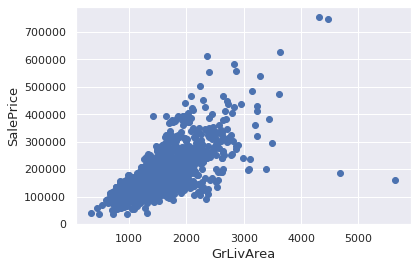

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

주택 면적이 넓은데 가격이 싼 데이터가 섞여있으므로, 이것은 outlier로 정의하고 삭제 처리

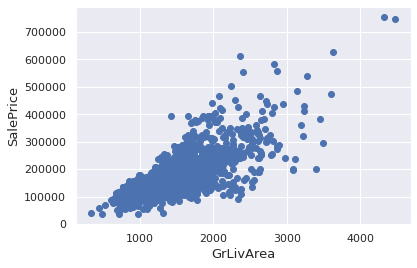

In [19]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice'] <300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### 7-2. Target Variable
- SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 180932.92 and sigma = 79467.79



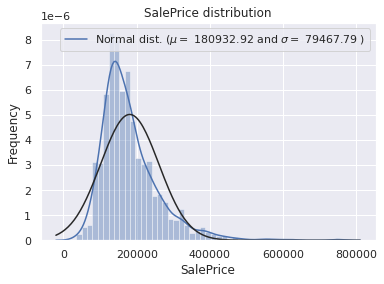

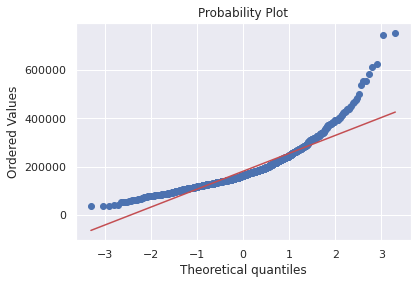

In [20]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



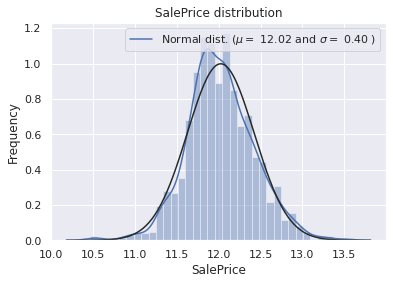

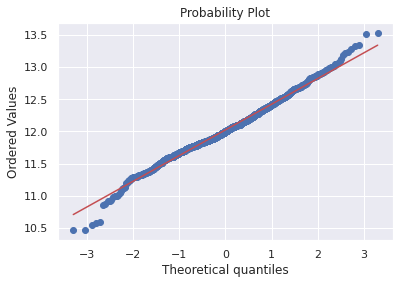

In [21]:
#We use the numpy function log1p which applies log(1+x) to all elements of the column
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check the new distribution
sns.distplot(train['SalePrice'] , fit=norm)

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- The skew seems now corrected and the data appears more normally distributted
- 'SalePrice`는 이제부터 log(1+x)로 변환하여 사용하겠음

In [22]:
train['SalePrice'].value_counts()

11.849405    20
11.813037    17
11.884496    14
11.951187    14
12.154785    13
             ..
12.091789     1
12.200562     1
12.574185     1
11.198228     1
11.841423     1
Name: SalePrice, Length: 662, dtype: int64

### 7-3. Feature engineering
Let's first concatenate the train and test data in the same dataframe

In [23]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis = 1, inplace=True)
print('all_data size is : {}'.format(all_data.shape))

all_data size is : (2917, 79)


### 7-4. Missing Data 채우기

In [24]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

In [25]:
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(20)

Missing Ratio
PoolQC            99.691464
MiscFeature       96.400411
Alley             93.212204
Fence             80.425094
FireplaceQu       48.680151
LotFrontage       16.660953
GarageFinish       5.450806
GarageYrBlt        5.450806
GarageQual         5.450806
GarageCond         5.450806
GarageType         5.382242
BsmtExposure       2.811107
BsmtCond           2.811107
BsmtQual           2.776826
BsmtFinType2       2.742544
BsmtFinType1       2.708262
MasVnrType         0.822763
MasVnrArea         0.788481
MSZoning           0.137127
BsmtFullBath       0.068564

Text(0.5, 1.0, 'Percent missing data by feature')

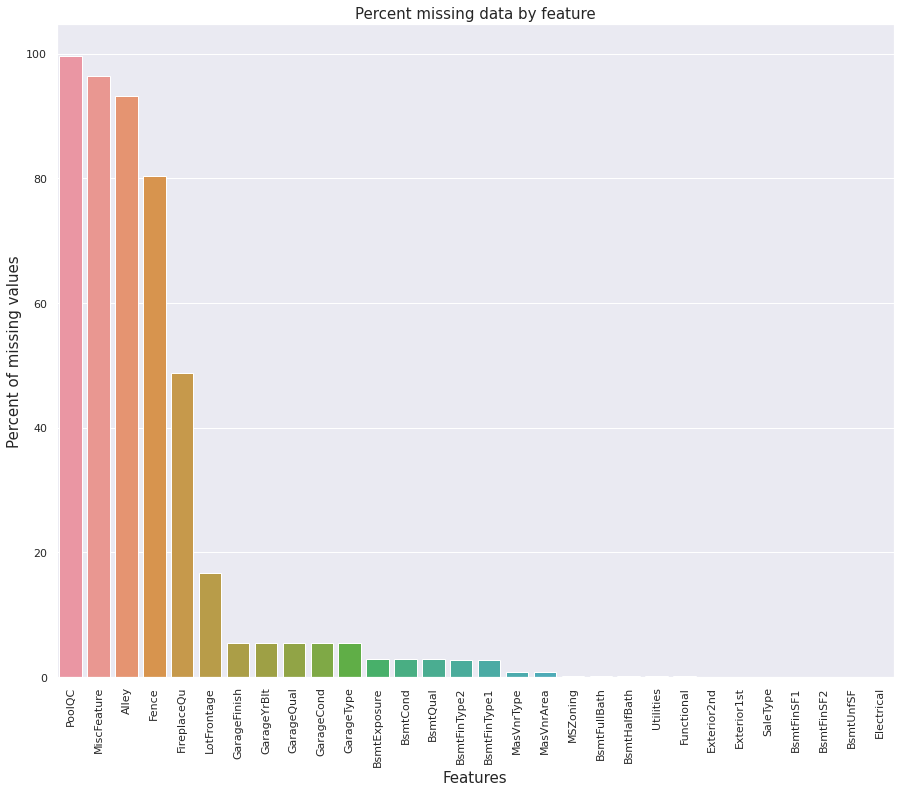

In [26]:
f, ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation = '90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### Data Correlation
- Feature와 SalePrice 와의 상관관계를 살펴보기
- 아래 그래프에서 마지막 row를 보면, 색깔에 따라 양/음의 상관관계 Correlation을 볼 수 있음

<AxesSubplot:>

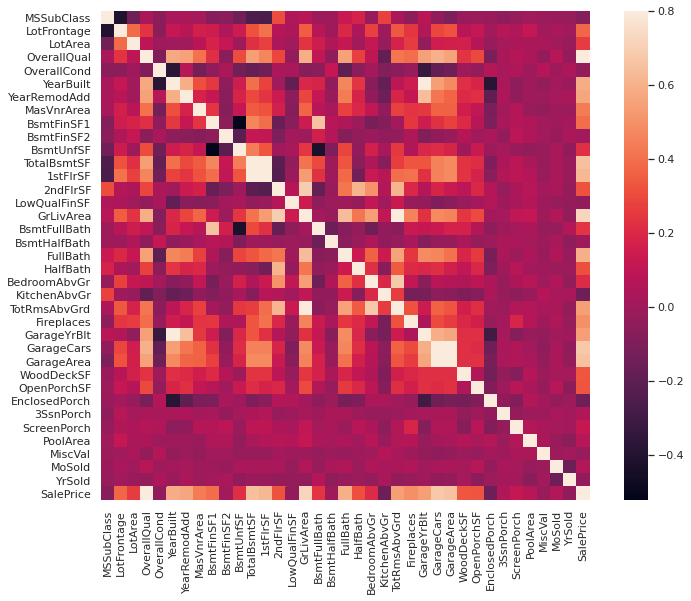

In [27]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True )

#### Imputing missing values
We impute them by proceeding sequentially through features with missing values
- PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [28]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

- MiscFeature : data description says NA means "no misc feature"

In [29]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

- Alley : data descriptin says NA means "no alley access"

In [30]:
all_data['Alley'] = all_data['Alley'].fillna('None')

- Fence : data description says NA means 'no fireplace'

In [31]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- FireplaceQu : data description says NA means "no fireplace"

In [32]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood

In [33]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform('median')

- GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [34]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')


- GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [35]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [36]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement

In [37]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [38]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- MSZoning (The general zoning classing) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [39]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and  2 NA. Since the house with 'NoSewa' is the training set, **this feature won't help in predictive modeling**. We can then safely remove it.

In [40]:
all_data = all_data.drop(['Utilities'], axis=1)

- Functional : data description says NA means typical

In [41]:
all_data["Functional"] = all_data["Functional"].fillna(all_data["Functional"].mode()[0])

- Electrical: It has one NA value. Since this feature has mostly 'SBkr', we can set that for the missing value

In [42]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- KitchenQual : Only one NA value, ans same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [43]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) 

- Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [44]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- SaleType : Fill in again with most frequent which is "WD"

In [45]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- MSSubClass : Na most likely means No building class. We can replace missing values with None

In [46]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Is there any remaining missing value ?

In [47]:
#Check remaining missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

It remains no missing value.

### 7-5. More features engineering
**Transforming some numerical variables that are really categorical**

In [48]:
#MSSubClass = The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


#### Label Encoding some categorical variables that may contain information in their ordering set

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
    
#process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

#LabelEncoder란 문자로 되어있는 class 를 숫자로 매핑시켜주는 역할을 함

In [51]:
#LabelEncoder 결과 샘플
all_data['FireplaceQu'].head()

0    3
1    5
2    5
3    2
4    5
Name: FireplaceQu, dtype: int64

In [52]:
# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### Adding one more important feature
- Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [53]:
# Adding total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### Skewed features

In [54]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [55]:
help(skew)
#skew 함수는 노말디스트리뷰션 성질을 해당 데이터가 가지고 있는지 지수로 보여주는 함수인 것이고, 0에 가까울 수록 좋다.
#ascending = False 라는 것은 내림차순

Help on function skew in module scipy.stats.stats:

skew(a, axis=0, bias=True, nan_policy='propagate')
    Compute the sample skewness of a data set.
    
    For normally distributed data, the skewness should be about zero. For
    unimodal continuous distributions, a skewness value greater than zero means
    that there is more weight in the right tail of the distribution. The
    function `skewtest` can be used to determine if the skewness value
    is close enough to zero, statistically speaking.
    
    Parameters
    ----------
    a : ndarray
        Input array.
    axis : int or None, optional
        Axis along which skewness is calculated. Default is 0.
        If None, compute over the whole array `a`.
    bias : bool, optional
        If False, then the calculations are corrected for statistical bias.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'pro

In [56]:
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew' : skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal        21.939672
PoolArea       17.688664
LotArea        13.109495
LowQualFinSF   12.084539
3SsnPorch      11.372080
LandSlope       4.973254
KitchenAbvGr    4.300550
BsmtFinSF2      4.144503
EnclosedPorch   4.002344
ScreenPorch     3.945101

### 7-6. Box Cox Transformation of (highly) skewed features

- We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x.
 Note that settign $\lambda$ = 0 is equivalent to log1p used above for the target variable.

In [57]:
skweness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


### 7-7. Getting dummy categorical features

In [58]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Colu

In [59]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)
all_data.columns

(2917, 220)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=220)

- Getting the new train and test sets.

In [60]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## 8. Modeling
- **Import libraries**

In [61]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### 8-1. Define a cross validation strategy
We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribute, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [62]:
#Validation function
n_folds=5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return rmse
# 참고로 logistic prediction 을 할 때에는 scoring 인자로 'accuracy'를 전달했었음: 타이타닉 문제
#
#k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)
#score = cross_val_score(clf, train_data, target, cv= k_fold, n_jobs =1 , scoring='accuracy')

In [63]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`

- make_pipeline 함수: [설명](https://skasha.tistory.com/80)  
![image](https://t1.daumcdn.net/cfile/tistory/99EF85365E24E3A41A)

### 8-2. Base models
- LASSO Regression:
    This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [64]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

- Elastic Net Regression:
    again made robust to outliers

In [65]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

- Kernel Ridge Regression:

In [66]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- Gradient Boosting Regression:
With huber loss that makes it robust to outliers

In [67]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)

- XGBoost

In [68]:
model_xgb = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma=0.0468, learning_rate = 0.05, max_depth=3,min_child_weight=1.7817, n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1, random_state=7, nthread=-1)

- LightGBM:

In [69]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rage =0.05, n_estimators=720, max_bin=55, bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf = 6, min_sum_hessian_in_leaf=11)

### 8-3. Base Models scores
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [70]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1116 (0.0075)



In [71]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0075)



In [72]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0077)



In [73]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1163 (0.0084)



In [74]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[21:48:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:48:38] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:48:44] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoo

In [75]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] Unknown parameter: learning_rage
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: learning_rage
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] 

## 9. Stacking models
**Simplest Stacking approach : Averaging base models**  
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

### 9-1. Averaged base models class

In [76]:
class AveraginModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        #clone(estimator, *, safe=True) Constructs a new estimator with the same parameters. Clone does a deep copy of the model in an estimator

        # Train cloned base models
        for model in self.models_:
            model.fit(X,y)

        return self

    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

### 9-2. Averaged base models score
We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix

In [77]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [78]:
averaged_models = AveraginModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

averaged_models.fit(train, y_train)
avg_train_pred =averaged_models.predict(train)
avg_pred = np.expm1(averaged_models.predict(test)) #np.expm1 함수는 입력 어레이의 값에 대해 exp(x)-1을 계산해줌
print('RMSLE score on train data:')
print(rmsle(y_train, avg_train_pred))

 Averaged base models score: 0.1088 (0.0077)

RMSLE score on train data:
0.07955087782628294


In [79]:
sub=pd.DataFrame()
sub['Id']=test_ID
sub['SalePrice']=avg_pred
sub.to_csv('submission.csv',index=False)

sub.head()

Id      SalePrice
0  1461  119205.318586
1  1462  161416.773339
2  1463  186769.010293
3  1464  195507.194226
4  1465  193035.814333

## 끝.

#### 추가적인 멤버함수 탐구
- pd 멤버 함수 중 `pd.get_dummies()`: one-hot encoding 처럼 class 가 object 로 구성된 칼럼을 indepent 칼럼으로 분리시켜주는 역할
- sklearn.preprocessing 멤버 함수 중 `LabelEncoder()`: mapping이랑 역할 똑같음

In [80]:
A = pd.DataFrame(data=[[1,'B',3],[1,'C',6],[7,'D',9]],columns=['one','two','three'], index=['1st','2nd','3rd'])
A

one two  three
1st    1   B      3
2nd    1   C      6
3rd    7   D      9

In [81]:
A=pd.get_dummies(A)
A

one  three  two_B  two_C  two_D
1st    1      3      1      0      0
2nd    1      6      0      1      0
3rd    7      9      0      0      1

In [82]:
A['mapping']=['A','B','C']
mapping_A={'A':1,'B':2,'C':3}
A['mapping']=A['mapping'].map(mapping_A)
A

one  three  two_B  two_C  two_D  mapping
1st    1      3      1      0      0        1
2nd    1      6      0      1      0        2
3rd    7      9      0      0      1        3

In [83]:
A['mapping']=['A','B','C']
le=LabelEncoder()
le.fit(A['mapping'])
A['mapping']=le.transform(A['mapping'])
A

one  three  two_B  two_C  two_D  mapping
1st    1      3      1      0      0        0
2nd    1      6      0      1      0        1
3rd    7      9      0      0      1        2